<a href="https://colab.research.google.com/github/ManuelD22/ICD/blob/master/ED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se quiere resolver la ecuacion diferencial
\begin{eqnarray}
\Phi''+\frac{\xi}{2}\Phi'+\frac{1}{2}\Phi=0 \\
\Phi''=-\frac{\xi}{2}\Phi'-\frac{1}{2}\Phi
\end{eqnarray}
Hacemos $\Phi'=y$, así
\begin{eqnarray}
y'&=&-\frac{\xi}{2}y-\frac{1}{2}\Phi \\
\vec{p}&=&\left[\begin{array}{c}{\Phi} \\ {y}\end{array}\right] \\
\vec{p}'&=&\left[\begin{array}{c}{\Phi'} \\ {y'}\end{array}\right]=\left[\begin{array}{c}{y} \\ {-\frac{\xi}{2}}y-\frac{1}{2}\Phi\end{array}\right]
\end{eqnarray}

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def p_dot(t_n,p_n):
  """regresa la derivada del vector p"""
  phi, y = p_n[0],p_n[1]
  phi_dot= y
  y_dot=-(1/2)*t_n*y-(1/2)*phi
  return np.asarray([phi_dot,y_dot])

In [0]:
def ppaso_euler(f,t_n,p_n,dt):
  """Toma un paso usando el metodo de euler
  p_n = valor actual del vector al tiempo t=t_n
  f = funcion que calcula la derivada de p(t)"""

  p_dot=f(t_n,p_n)
  p_n_mas_1=p_n+dt*p_dot
  return p_n_mas_1

In [0]:
def integrador_simple(f,t,p_0,dt):
  """Calcula la trayectoria de valores de p usando el metodo de
  Euler con pasos constantes
  f = funcion que calcula la derivada de p(t), p(t,y)
  p_0 = valor inicial de p, p_0=[p0_0,p1_0,...]
  t = lista con el intervalo[t_0, t_f]
  dt = distancia entre pasos de tiempo"""
  
  t_0,t_f=t
  n=int((t_f-t_0)/dt)
  d=len(p_0)
  p_tray=np.zeros(((n+1),d))
  t=np.linspace(t_0,t_f,n+1)
  p_tray[0,:]=p_0
  for i in range(n):
    p_tray[i+1,:]=ppaso_euler(f,t[i],p_tray[i,:],dt)
  return t, p_tray

In [0]:
t1, p_traj=integrador_simple(p_dot,[0,10],[1.,0.],0.001)

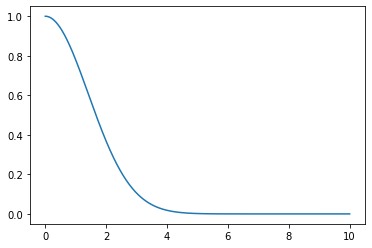

In [0]:
plt.plot(t1,p_traj[:,0])

Sin embargo, solo se tienen los pasos positivos, para tener la otra mitad de la grafica definimos un paso de euler negativo y un integrador simple

In [0]:
def npaso_euler(f,t_n,p_n,dt):
  p_dot = f(t_n, p_n)
  p_n_mas_1 = p_n - dt*p_dot
  return p_n_mas_1

In [0]:
def nintegrador_simple(f,t,p_0,dt):
  t_0,t_f=t
  n=int((t_0-t_f)/dt)   
  d=len(p_0)
  p_tray=np.zeros(((n+1),d))
  t=np.linspace(t_0,t_f,n+1)
  p_tray[0,:]=p_0
  for i in range(n):
    p_tray[i+1,:]=npaso_euler(f,t[i],p_tray[i,:],dt)
  return t, p_tray

In [0]:
t2,np_traj=nintegrador_simple(p_dot,[0,-10],[1,0],0.001)

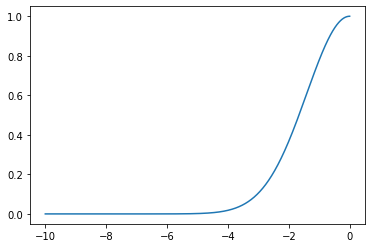

In [0]:
plt.plot(t2,np_traj[:,0])

Asi, ploteando ambas graficas

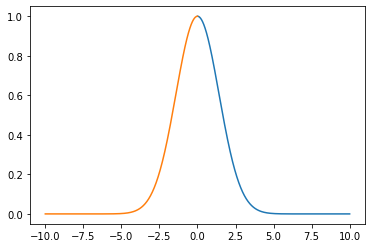

In [0]:
plt.plot(t1,p_traj[:,0])
plt.plot(t2,np_traj[:,0])


In [0]:
def graficador(f,t,q_0,dt):
  t1, p_traj=integrador_simple(p_dot,[t[0],t[1]],q_0,0.001)
  t2,np_traj=nintegrador_simple(p_dot,[t[0],-t[1]],q_0,0.001)
  
  return plt.plot(t1,p_traj[:,0]),plt.plot(t2,np_traj[:,0])


([<matplotlib.lines.Line2D at 0x7f8660a52518>],
 [<matplotlib.lines.Line2D at 0x7f8660a52668>])

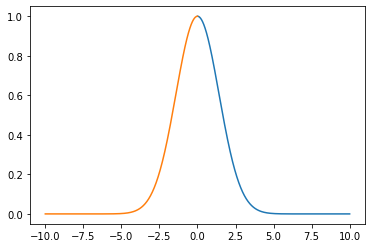

In [0]:
graficador(p_dot,[0,10],[1.,0.],0.001)